# Задача к лекции "Восстановление кривой доходности"
Взять значения базовых ставок https://sebgroup.com/large-corporates-and-institutions/prospectuses-and-downloads/rates/base-rates
и цену процентных свопов https://sebgroup.com/large-corporates-and-institutions/prospectuses-and-downloads/rates/swap-rates
Восстановить кривую для Вашей валюты 

In [1]:
def getVariant(email):
    ccy = ['NOK', 'SEK', 'DKK', 'EUR']
    h = hash(email)
    ccy1 = ccy[h % 5]

    print 'Task 1: 5Y curve for ' + ccy1
getVariant('kirinari@bk.ru')

Task 1: 5Y curve for SEK


In [2]:
import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as pt

r12:  0.00030003341881243786 0.000299977502249715
r24:  0.0 0.0
r36:  0.0 0.0
r48:  0.000400410024467915 0.00040017013607221457
r60:  0.0007003477273820826 0.0007005925133930044


Text(0,0.5,u'SEK rate')

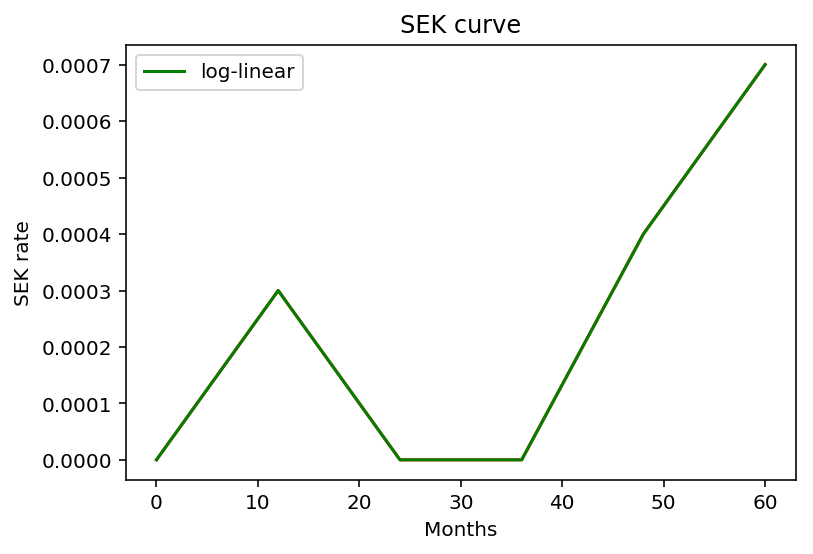

In [3]:
s0 = 0.0
s1 = 0.03e-2
s2 = 0
s3 = 0
s4 = 0.04e-2
s5 = 0.07e-2


r0 = s0

# Дискаунт фактор из процентной ставки
# для простоты капитализация процентов не учитывается
def DF(L,m):
    return 1.0 / (1.0 + L*m/12)

def DF_exp(L,m):
    return np.exp(-L*m/12)


def S1(r12, r0, s1):
    r6 = 0.5* (r0 + r12)
    df6 = DF(r6, 6)
    df12 = DF(r12, 12)
    price = 2*(1 - df12) / (df6 + df12)
    return price - s1

def S1_loglin(r12, r0, s):
    df12 = DF_exp(r12, 12)
    df6 = np.sqrt(df12)
    price = 2*(1 - df12) / (df6 + df12)
    return price - s

def S2(r24, r12, r0, s2):
    r6 = 0.5 * (r0 + r12)
    r18 = 0.5 * (r12 + r24)
    df6 = DF(r6, 6)
    df12 = DF(r12, 12)
    df18 = DF(r18, 18)
    df24 = DF(r24, 24)
    price = 2*(1 - df24) / (df6 + df12 + df18 + df24)
    return price - s2

def S2_loglin(r24, r12, r0, s2):
    df12 = DF_exp(r12, 12)
    df24 = DF_exp(r24, 24)
    df18 = np.sqrt(df12*df24)
    df6 = np.sqrt(df12)
    price = 2*(1 - df24) / (df6 + df12 + df18 + df24)
    return price - s2

def S3_loglin(r36, r24, r12, r0, s3):
    df12 = DF_exp(r12, 12)
    df24 = DF_exp(r24, 24)
    df36 = DF_exp(r36, 36)
    df6 = np.sqrt(df12)
    df18 = np.sqrt(df12*df24)
    df30 = np.sqrt(df24*df36)
    price = 2*(1 - df36) / (df6 + df12 + df18 + df24 + df30 + df36)
    return price - s3

def S3(r36, r24, r12, r0, s3):
    r6 = 0.5 * (r0 + r12)
    r18 = 0.5 * (r12 + r24)
    r30 = 0.5 * (r24 + r36)
    df6 = DF(r6, 6)
    df12 = DF(r12, 12)
    df18 = DF(r18, 18)
    df24 = DF(r24, 24)
    df30 = DF(r30, 30)
    df36 = DF(r36, 36)
    price = 2*(1 - df36) / (df6 + df12 + df18 + df24 + df30 + df36)
    return price - s3

def S4(r48, r36, r24, r12, r0, s4):
    r6 = 0.5 * (r0 + r12)
    r18 = 0.5 * (r12 + r24)
    r30 = 0.5 * (r24 + r36)
    r42 = 0.5 * (r36 + r48)
    df6 = DF(r6, 6)
    df12 = DF(r12, 12)
    df18 = DF(r18, 18)
    df24 = DF(r24, 24)
    df30 = DF(r30, 30)
    df36 = DF(r36, 36)
    df42 = DF(r42, 42)
    df48 = DF(r48, 48)
    price = 2*(1 - df48) / (df6 + df12 + df18 + df24 + df30 + df36 + df42 + df48)
    return price - s4

def S4_loglin(r48, r36, r24, r12, r0, s4):
    df12 = DF_exp(r12, 12)
    df24 = DF_exp(r24, 24)
    df36 = DF_exp(r36, 36)
    df48 = DF_exp(r48, 48)
    df6 = np.sqrt(df12)
    df18 = np.sqrt(df12*df24)
    df30 = np.sqrt(df24*df36)
    df42 = np.sqrt(df36*df48)
    price = 2*(1 - df48) / (df6 + df12 + df18 + df24 + df30 + df36 + df42 + df48)
    return price - s4




def S5(r60, r48, r36, r24, r12, r0, s5):
    r6 = 0.5 * (r0 + r12)
    r18 = 0.5 * (r12 + r24)
    r30 = 0.5 * (r24 + r36)
    r42 = 0.5 * (r36 + r48)
    r54 = 0.5 * (r48 + r60)
    df6 = DF(r6, 6)
    df12 = DF(r12, 12)
    df18 = DF(r18, 18)
    df24 = DF(r24, 24)
    df30 = DF(r30, 30)
    df36 = DF(r36, 36)
    df42 = DF(r42, 42)
    df48 = DF(r48, 48)
    df54 = DF(r54, 54)
    df60 = DF(r60, 60)
    price = 2*(1 - df60) / (df6 + df12 + df18 + df24 + df30 + df36 + df42 + df48 + df54 + df60)
    return price - s5

def S5_loglin(r60, r48, r36, r24, r12, r0, s5):
    df12 = DF_exp(r12, 12)
    df24 = DF_exp(r24, 24)
    df36 = DF_exp(r36, 36)
    df48 = DF_exp(r48, 48)
    df60 = DF_exp(r60, 60)
    df6 = np.sqrt(df12)
    df18 = np.sqrt(df12*df24)
    df30 = np.sqrt(df24*df36)
    df42 = np.sqrt(df36*df48)
    df54 = np.sqrt(df48 * df60)
    price = 2*(1 - df60) / (df6 + df12 + df18 + df24 + df30 + df36 + df42 + df48 + df54 + df60)
    return price - s5


r12 = scipy.optimize.broyden1(lambda x: S1(x, r0, s1), r0)
r12_loglin = scipy.optimize.fsolve(lambda x: S1_loglin(x, r0, s1), r0)

r24 = scipy.optimize.broyden1(lambda x: S2(x, r12, r0, s2), r0)
r24_loglin = scipy.optimize.fsolve(lambda x: S2_loglin(x, r12_loglin, r0, s2), r0)

r36 = scipy.optimize.broyden1(lambda x: S3(x, r24, r12, r0, s3), r0)
r36_loglin = scipy.optimize.fsolve(lambda x: S3_loglin(x, r24_loglin, r12_loglin, r0, s3), r0)

r48 = scipy.optimize.broyden1(lambda x: S4(x, r36, r24, r12, r0, s4), r0)
r48_loglin = scipy.optimize.fsolve(lambda x: S4_loglin(x, r36_loglin, r24_loglin, r12_loglin, r0, s4), r0)

r60 = scipy.optimize.broyden1(lambda x: S5(x, r48, r36, r24, r12, r0, s5), r0)
r60_loglin = scipy.optimize.fsolve(lambda x: S5_loglin(x, r48_loglin, r36_loglin, r24_loglin, r12_loglin, r0, s5), r0)

print "r12: ",r12, r12_loglin[0]
print "r24: ", r24, r24_loglin[0]
print "r36: ", r36, r36_loglin[0]
print "r48: ", r48, r48_loglin[0]
print "r60: ", r60, r60_loglin[0]


pt.plot([0,12, 24, 36, 48, 60], [r0, r12, r24, r36, r48, r60], color = "red")
pt.plot([0,12, 24, 36, 48, 60], [r0, r12_loglin, r24_loglin, r36_loglin, r48_loglin, r60_loglin], color = "green", label = "log-linear")
pt.legend()
pt.title("SEK curve")
pt.xlabel("Months")
pt.ylabel("SEK rate")